In [1]:
import pandas as pd
#import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# third party imports
from datetime import datetime
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# for inline display
%matplotlib inline

#stop unnecessary warnings from printing to the screen
warnings.simplefilter('ignore')

C:\Users\pritam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading datasets for 100000 rows because dataset is very large
destination=pd.read_csv("destinations.csv",nrows=100000)
destination.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [3]:
# loading training datasets
train=pd.read_csv('train.csv',nrows=100000)
train.head()


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
# eda of training data
train.describe()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,63078.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,9.10014,2.637850,84.531040,311.630930,28465.223540,1897.609161,195700.878390,0.138030,0.260470,5.760540,...,0.325160,1.112700,14511.034340,2.590540,0.08270,1.477770,3.206530,80.972620,597.559610,49.74576
std,12.09091,0.751001,54.320574,209.399151,16822.922817,2123.885180,110173.879786,0.344933,0.438893,3.771156,...,0.722341,0.441928,11043.082364,2.160456,0.27543,1.197163,1.624119,55.679861,507.624672,28.95063
min,2.00000,0.000000,0.000000,0.000000,3.000000,0.005600,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,2.00000,3.000000,66.000000,174.000000,13914.000000,290.528875,107548.000000,0.000000,0.000000,2.000000,...,0.000000,1.000000,8267.000000,1.000000,0.00000,1.000000,2.000000,50.000000,160.000000,25.00000
50%,2.00000,3.000000,66.000000,311.000000,27733.000000,1093.888450,181983.000000,0.000000,0.000000,9.000000,...,0.000000,1.000000,11271.000000,1.000000,0.00000,1.000000,2.000000,50.000000,585.000000,49.00000
75%,11.00000,3.000000,69.000000,385.000000,43113.000000,2518.177400,301357.000000,0.000000,1.000000,9.000000,...,0.000000,1.000000,18881.000000,5.000000,0.00000,2.000000,4.000000,106.000000,701.000000,73.00000
max,53.00000,4.000000,239.000000,1025.000000,56495.000000,11641.224200,391007.000000,1.000000,1.000000,10.000000,...,9.000000,8.000000,65035.000000,9.000000,1.00000,59.000000,6.000000,212.000000,2117.000000,99.00000


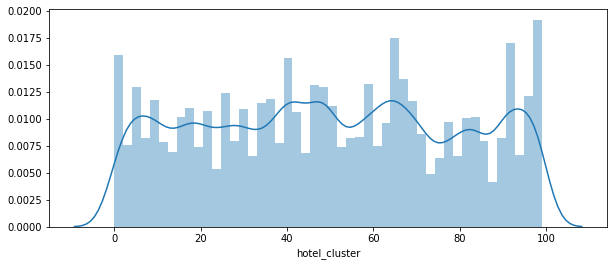

In [5]:
# histogram of clusters
plt.figure(figsize=(10, 4))
sns.distplot(train['hotel_cluster'])

In [6]:
# from the above plot it is prove that it has 100 clusters and there is little bit skewness in the data.


In [7]:
# get year part from a date

def get_year(x):
    '''
    Args:
        datetime
    Returns:
        year as numeric
    '''
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return 2013
    pass

# get month part from a date

def get_month(x):
    '''
    Args:
        datetime
    Returns:
        month as numeric
    '''    
    if x is not None and type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return 1
    pass

# extract year and month from date time column
train['date_time_year'] = pd.Series(train.date_time, index = train.index)
train['date_time_month'] = pd.Series(train.date_time, index = train.index)

train.date_time_year = train.date_time_year.apply(lambda x: get_year(x))
train.date_time_month = train.date_time_month.apply(lambda x: get_month(x))
del train['date_time']

# extract year and month from check in date column
train['srch_ci_year'] = pd.Series(train.srch_ci, index = train.index)
train['srch_ci_month'] = pd.Series(train.srch_ci, index = train.index)

train.srch_ci_year = train.srch_ci_year.apply(lambda x: get_year(x))
train.srch_ci_month = train.srch_ci_month.apply(lambda x: get_month(x))
del train['srch_ci']

# extract year and month from check out date column
train['srch_co_year'] = pd.Series(train.srch_co, index = train.index)
train['srch_co_month'] = pd.Series(train.srch_co, index = train.index)

train.srch_co_year = train.srch_co_year.apply(lambda x: get_year(x))
train.srch_co_month = train.srch_co_month.apply(lambda x: get_month(x))
del train['srch_co']

# check the transform
train.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month
0,2,3,66,348,48862,2234.2641,12,0,1,9,...,2,50,628,1,2014,8,2014,8,2014,8
1,2,3,66,348,48862,2234.2641,12,0,1,9,...,2,50,628,1,2014,8,2014,8,2014,9
2,2,3,66,348,48862,2234.2641,12,0,0,9,...,2,50,628,1,2014,8,2014,8,2014,9
3,2,3,66,442,35390,913.1932,93,0,0,3,...,2,50,1457,80,2014,8,2014,11,2014,11
4,2,3,66,442,35390,913.6259,93,0,0,3,...,2,50,1457,21,2014,8,2014,11,2014,11


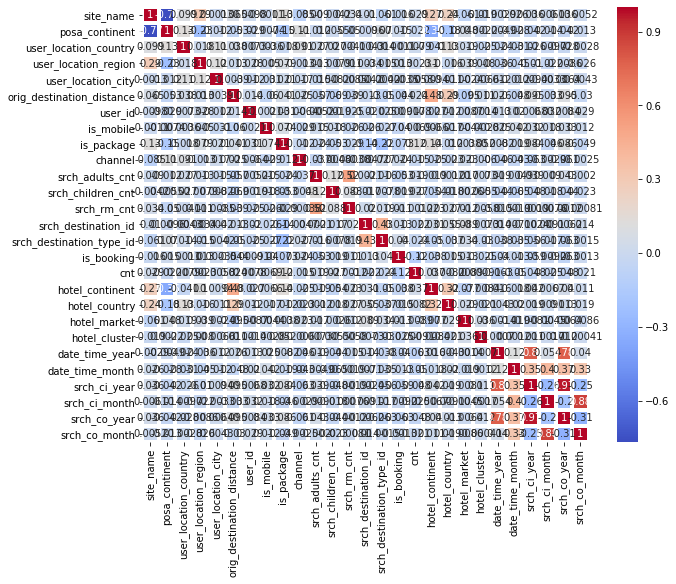

In [8]:
# creating heat map to see the correlation of the variables
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.heatmap(train.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=3)

In [9]:
# checking the relationship of the cluster to other variables
train.corr()["hotel_cluster"].sort_values()

srch_destination_type_id    -0.030064
is_booking                  -0.025380
user_location_country       -0.025170
hotel_country               -0.021170
site_name                   -0.019154
hotel_continent             -0.008441
srch_destination_id         -0.007258
user_location_city          -0.006580
channel                     -0.005956
srch_rm_cnt                 -0.005801
is_mobile                   -0.002803
srch_co_month               -0.000413
date_time_year               0.000696
cnt                          0.000914
date_time_month              0.001208
user_id                      0.001396
srch_ci_month                0.001682
posa_continent               0.002204
srch_children_cnt            0.005469
srch_adults_cnt              0.007322
user_location_region         0.008037
srch_ci_year                 0.010879
orig_destination_distance    0.011362
srch_co_year                 0.012014
hotel_market                 0.036107
is_package                   0.051955
hotel_cluste

In [10]:
# From above summary, it is concluded that there is no strong linear relationship between hotel_cluster and other variables.

In [11]:
# we do not care about click, we want only book data where click=0 and book=1
train_book = train.loc[train['is_booking'] == 1]

In [12]:
# lets find the factor associated with booking activities
booking = [train_book.groupby(['srch_destination_id','hotel_country','hotel_market','is_package','hotel_cluster'])['is_booking'].agg(['sum','count'])]
summ = pd.concat(booking).groupby(level=[0,1,2,3,4]).sum()
summ.dropna(inplace=True)
summ.head()


sum  \
srch_destination_id hotel_country hotel_market is_package hotel_cluster        
8                   50            416          0          32               1   
                                                          77               1   
11                  50            824          0          94               1   
14                  27            1434         0          20               1   
16                  50            419          0          7                1   

                                                                         count  
srch_destination_id hotel_country hotel_market is_package hotel_cluster         
8                   50            416          0          32                 1  
                                                          77                 1  
11                  50            824          0          94                 1  
14                  27            1434         0          20                 1  
16                  50            419          0          7                  1

In [13]:
summ['sum_and_cnt'] = 0.85*summ['sum'] + 0.15*summ['count']
summ = summ.groupby(level=[0,1,2,3]).apply(lambda x: x.astype(float)/x.sum())
summ.reset_index(inplace=True)
summ.head()

,srch_destination_id,hotel_country,hotel_market,is_package,hotel_cluster,sum,count,sum_and_cnt
0,8,50,416,0,32,0.5,0.5,0.5
1,8,50,416,0,77,0.5,0.5,0.5
2,11,50,824,0,94,1.0,1.0,1.0
3,14,27,1434,0,20,1.0,1.0,1.0
4,16,50,419,0,7,1.0,1.0,1.0


In [14]:
o=summ.sum_and_cnt.max()
o

1.0

In [15]:
# Best hotel based on the booking
hotel_cluster=summ.loc[o,'hotel_cluster']
hotel_cluster

77

In [72]:
# step 3
summ_pivot = summ.pivot_table(index=['srch_destination_id','hotel_country','hotel_market','is_package'], columns='hotel_cluster', values='sum_and_cnt').reset_index()
summ_pivot.head()

hotel_cluster,srch_destination_id,hotel_country,hotel_market,is_package,0,1,2,3,4,5,...,90,91,92,93,94,95,96,97,98,99
0,8,50,416,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,50,824,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,14,27,1434,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,50,419,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,77,1454,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_book = pd.merge(train_book, destination, how='left', on='srch_destination_id')
train_book = pd.merge(train_book, summ_pivot, how='left', on=['srch_destination_id','hotel_country','hotel_market','is_package'])
train_book.fillna(0, inplace=True)
train_book.shape

In [19]:
# checking data structure 
train_book.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,hotel_continent,hotel_country,hotel_market,hotel_cluster,date_time_year,date_time_month,srch_ci_year,srch_ci_month,srch_co_year,srch_co_month
1,2,3,66,348,48862,2234.2641,12,0,1,9,...,2,50,628,1,2014,8,2014,8,2014,9
20,2,3,66,318,52078,NaN,756,0,1,4,...,2,50,191,2,2014,2,2014,4,2014,4
27,30,4,195,548,56440,NaN,1048,0,1,9,...,0,185,185,58,2013,6,2013,9,2013,9
72,30,4,195,991,47725,NaN,1048,0,0,9,...,3,151,69,36,2014,11,2015,6,2015,6
79,2,3,66,462,41898,2454.8588,1482,0,1,1,...,2,50,680,95,2014,1,2014,2,2014,2


In [ ]:
# lets separate the target variable and apply the models
X = train_book.drop(['user_id', 'hotel_cluster', 'is_booking'], axis=1)
y = train_book.hotel_cluster
X.shape, y.shape

In [ ]:
# checking the unique closter
y.nunique()

In [ ]:
# applying SVM
classifier = make_pipeline(preprocessing.StandardScaler(), svm.SVC(decision_function_shape='ovo'))
np.mean(cross_val_score(classifier, X, y, cv=10))

In [ ]:
# applying logistic regression
classifier = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(multi_class='ovr'))
np.mean(cross_val_score(classifier, X, y, cv=10))

In [ ]:
# applying Naive Bayes classifier
classifier = make_pipeline(preprocessing.StandardScaler(), GaussianNB(priors=None))
np.mean(cross_val_score(classifier, X, y, cv=10))

In [ ]:
# applying k nearest neighbors 
classifier = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=5))
np.mean(cross_val_score(classifier, X, y, cv=10, scoring='accuracy'))